In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import time

In [2]:
data = pd.read_csv('creditcard_2023.csv')
data

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [4]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.drop(columns=['id'], inplace=True) 

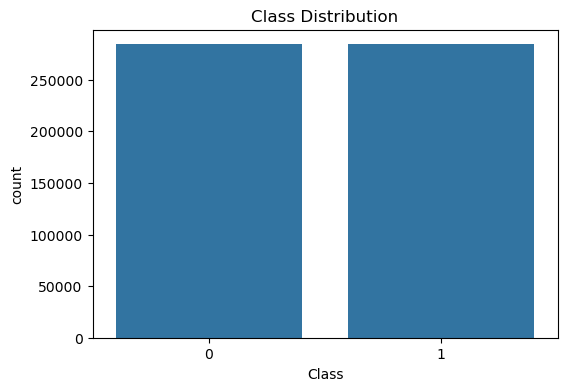

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

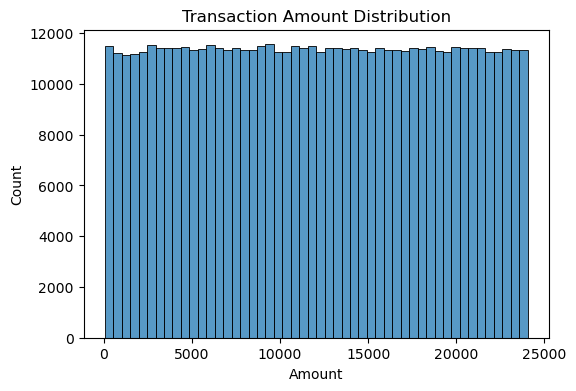

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(data['Amount'], bins=50)
plt.title('Transaction Amount Distribution')
plt.show()

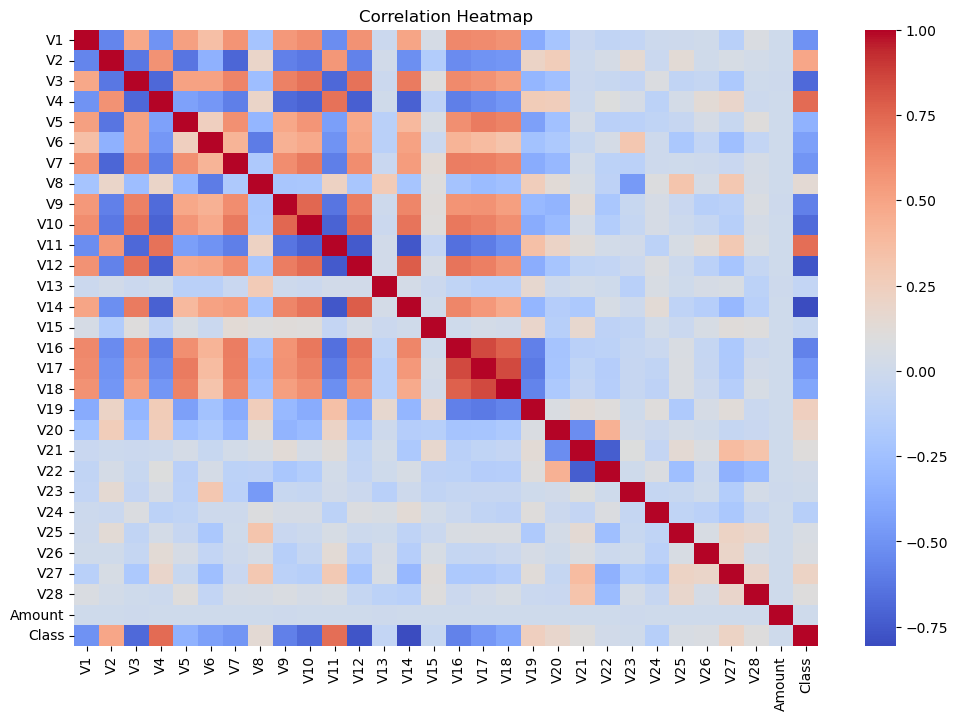

In [8]:
plt.figure(figsize=(12,8))
corr = data.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

In [10]:
if 'user_id' in data.columns:
    data['Transaction_Frequency'] = data.groupby('user_id')['Amount'].transform('count')
else:
    data['Transaction_Frequency'] = 1  

if 'user_id' in data.columns:
    data['Mean_Transaction_Amount'] = data.groupby('user_id')['Amount'].transform('mean')
else:
    data['Mean_Transaction_Amount'] = data['Amount'] 

if 'Time' in data.columns:
    data['Hour'] = (data['Time'] / 3600).astype(int) % 24
    data['Time_Since_Last_Transaction'] = data.groupby('user_id')['Time'].diff().fillna(0)
else:
    data['Hour'] = 0 
    data['Time_Since_Last_Transaction'] = 0  

if 'Merchant_ID' in data.columns:
    data['Merchant_Transaction_Count'] = data.groupby('Merchant_ID')['Amount'].transform('count')
else:
    data['Merchant_Transaction_Count'] = 1  


In [11]:
X = data.drop('Class', axis=1)
y = data['Class']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), ['Amount', 'Transaction_Frequency', 'Mean_Transaction_Amount', 'Hour',
                                     'Time_Since_Last_Transaction', 'Merchant_Transaction_Count'])],
    remainder='passthrough'
)

In [14]:
pca = PCA(n_components=0.95)
logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', LogisticRegression(max_iter=1000))
])

random_forest_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', RandomForestClassifier(random_state=42))
])

neural_network_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', MLPClassifier(random_state=42))
])

pipelines = {
    'Logistic Regression (PCA)': logistic_pipeline,
    'Random Forest (PCA)': random_forest_pipeline,
    'Neural Network (PCA)': neural_network_pipeline
}

In [15]:
results = {}

for name, pipeline in pipelines.items():
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    start_time = time.time()
    predictions = pipeline.predict(X_test)
    predict_time = time.time() - start_time
    
    auc_roc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
    report = classification_report(y_test, predictions)
    
    results[name] = {
        'classification_report': report,
        'AUC-ROC': auc_roc,
        'train_time': train_time,
        'predict_time': predict_time
    }

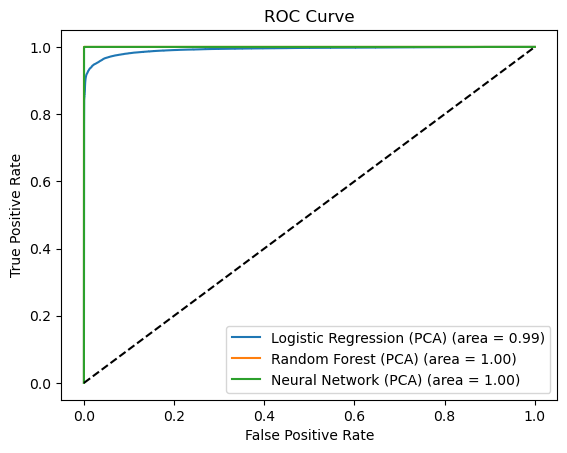

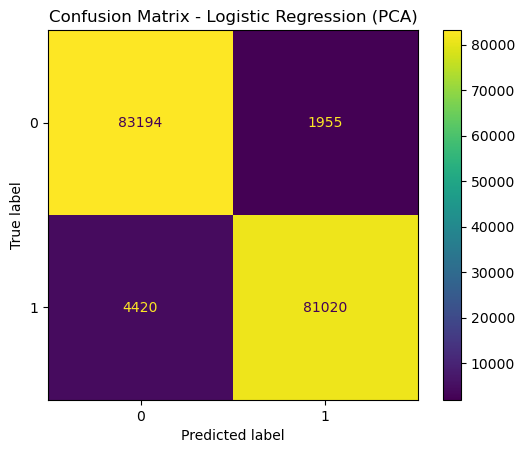

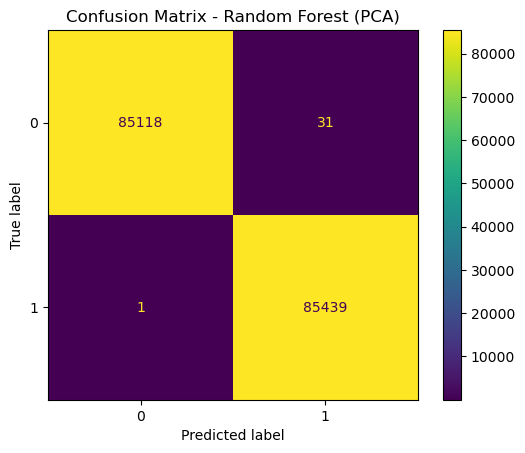

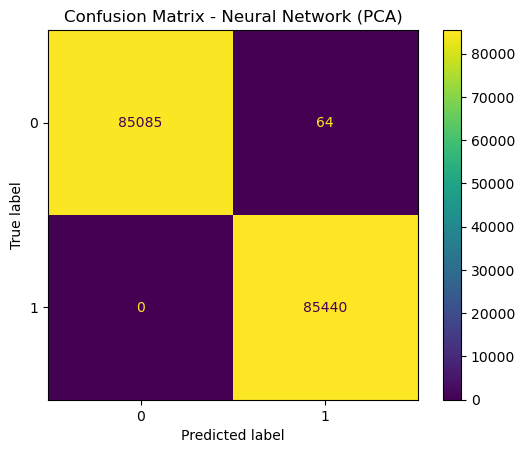

In [16]:
plt.figure()
for name in results:
    fpr, tpr, _ = roc_curve(y_test, pipelines[name].predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (area = {results[name]["AUC-ROC"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

for name in results:
    cm = confusion_matrix(y_test, pipelines[name].predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [17]:
for name, result in results.items():
    print(f"{name}\n"
          f"Classification Report:\n{result['classification_report']}\n"
          f"AUC-ROC: {result['AUC-ROC']}\n"
          f"Training Time: {result['train_time']:.4f} seconds\n"
          f"Prediction Time: {result['predict_time']:.4f} seconds\n")

Logistic Regression (PCA)
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     85149
           1       0.98      0.95      0.96     85440

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589

AUC-ROC: 0.9922872333304215
Training Time: 0.7765 seconds
Prediction Time: 0.0746 seconds

Random Forest (PCA)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

AUC-ROC: 0.9999981486242908
Training Time: 315.8955 seconds
Prediction Time: 1.7518 seconds

Neural Network (PCA)
Classification Report:
              precision   